#TASK1 - Reading Paper and reproducing results for ML methods

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline

file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_missing_values] = data[columns_with_missing_values].replace(0, np.nan)

imputer = SimpleImputer(strategy='median')
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])

scaler = StandardScaler()
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

estimators = [('dt', dt), ('rf', rf), ('svm', svm)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")
    print("")

evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_stack, "Stacking Ensemble")

def cross_validate_model(model, X, y, model_name):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores) * 100:.2f}%")

cross_validate_model(dt, X_resampled, y_resampled, "Decision Tree")
cross_validate_model(rf, X_resampled, y_resampled, "Random Forest")
cross_validate_model(svm, X_resampled, y_resampled, "SVM")
cross_validate_model(stacking_clf, X_resampled, y_resampled, "Stacking Ensemble")


Decision Tree Results:
Accuracy: 76.33%
Precision: 75.32%
Recall: 78.81%
F1-Score: 77.02%

Random Forest Results:
Accuracy: 75.67%
Precision: 74.07%
Recall: 79.47%
F1-Score: 76.68%

SVM Results:
Accuracy: 75.33%
Precision: 76.92%
Recall: 72.85%
F1-Score: 74.83%

Stacking Ensemble Results:
Accuracy: 80.67%
Precision: 78.88%
Recall: 84.11%
F1-Score: 81.41%

Decision Tree Cross-Validation Accuracy: 77.00%
Random Forest Cross-Validation Accuracy: 83.20%
SVM Cross-Validation Accuracy: 74.00%
Stacking Ensemble Cross-Validation Accuracy: 81.80%


In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


#TASK2 Proposed solution based on voting classifier

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Voting Classifier Results:
Accuracy: 79.33%
Precision: 81.13%
Recall: 56.58%
F1-Score: 66.67%


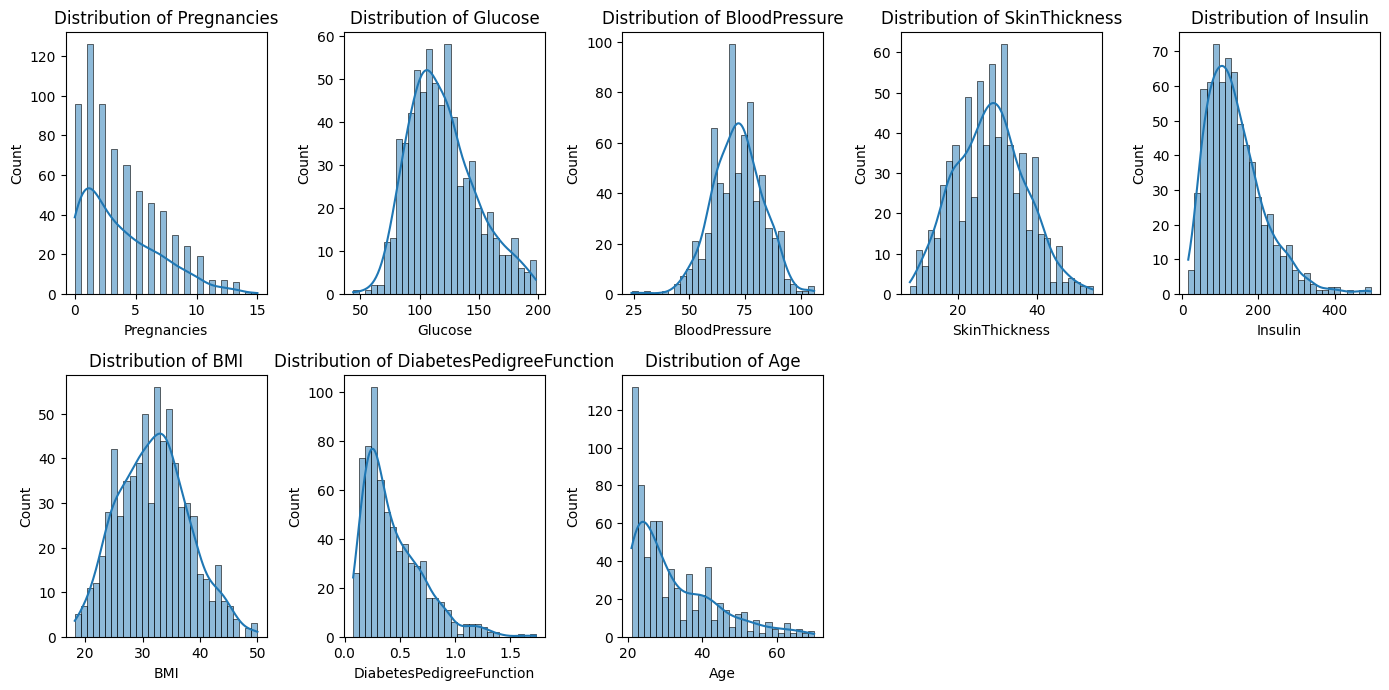

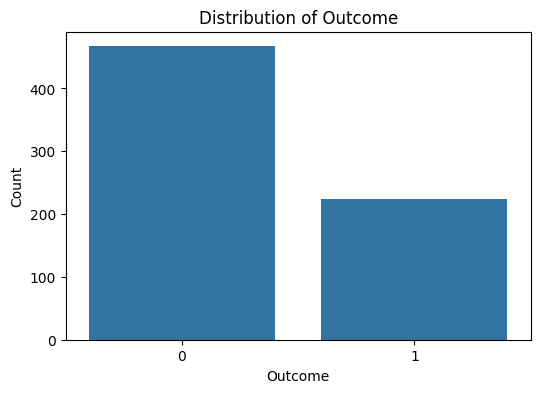

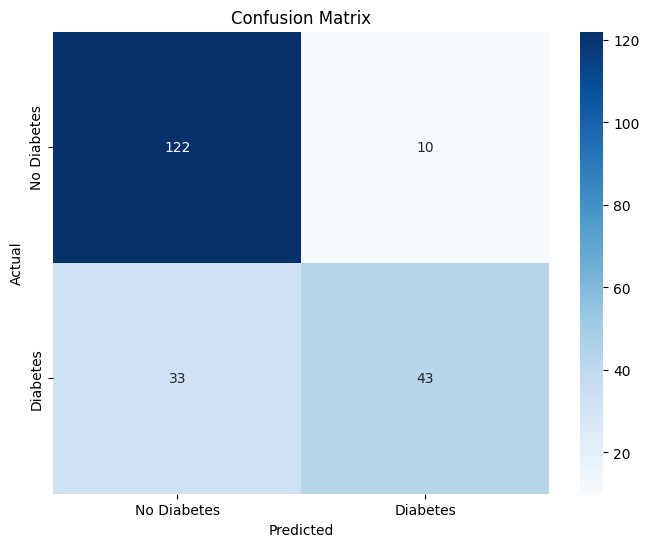

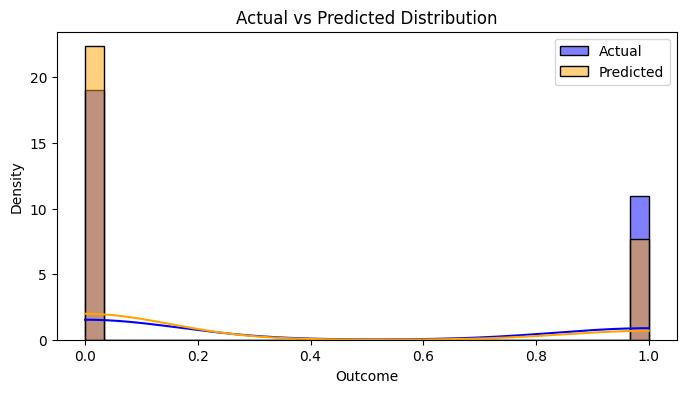

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

print(data.isnull().sum())

columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_missing_values] = data[columns_with_missing_values].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5)
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])

iso = IsolationForest(contamination=0.1)
data['outlier'] = iso.fit_predict(data.drop('Outcome', axis=1))
data = data[data['outlier'] == 1].drop('outlier', axis=1)

scaler = StandardScaler()
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=42)

rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [4, 6, 8]}
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='f1')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

svc_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc_grid_search = GridSearchCV(SVC(probability=True), svc_param_grid, cv=5, scoring='f1')
svc_grid_search.fit(X_train, y_train)
best_svc_model = svc_grid_search.best_estimator_

voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('svc', best_svc_model),
    ('lr', LogisticRegression())
], voting='soft')

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Voting Classifier Results:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

plt.figure(figsize=(14, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 5, i + 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(y_test, color='blue', label='Actual', kde=True, stat='density', bins=30)
sns.histplot(y_pred, color='orange', label='Predicted', kde=True, stat='density', bins=30)
plt.title('Actual vs Predicted Distribution')
plt.xlabel('Outcome')
plt.ylabel('Density')
plt.legend()
plt.show()
